# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Please enter your own key in the "api_keys.py" file to run the code.

### Observations based on Analysis done below

1.Temperature seems to have a clear correlation with latitude, the weather becomes significantly warmer as one approaches the equator (0 degrees). As latitude moves away from equator, temperature also decreases which is expected.

2.While it looks like there is no strong relationship between latitude and wind speed, the cities with wind speeds over 15 mph increases when you move away from the equator from both the direction. However more data needs to be examined to make a stronger conclusion.

3.It seems that there is no correlation between humidity and latitude. However, there is a slightly larger cluster of northern hemisphere cities with high humidity (above 60% humidity)


In [1]:
# Dependencies and Setup
#!pip install citypy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(123)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#print (query_url)


In [4]:
# set lists to store response
city_data = []
cloudinesses = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

#Variables to keep track of response number
record_num = 0
record_set = 1


In [5]:
#Run the API call for each city
print('''
Beginning Data Retrieval
-----------------------------''')

for city in cities:
    try:
        print(f"Processing Record {record_num} of Set {record_set} | {city}")
        response = requests.get(query_url + city).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        city_data.append(response['name'])
        
        #Increase the record count
        record_num += 1
    
    except Exception:
        print("City not found. Skipping...")
        record_num += 1
        
        #If statement to handle the API call limits
    if record_num == 50:
        record_set += 1
        record_num = 0
        time.sleep(1)
print("------------------------------\nData Retrieval Complete\n------------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | camacha
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | bargal
City not found. Skipping...
Processing Record 4 of Set 1 | manacor
Processing Record 5 of Set 1 | sao jose da coroa grande
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | levelland
Processing Record 8 of Set 1 | ambon
Processing Record 9 of Set 1 | morondava
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ogden
Processing Record 12 of Set 1 | alta floresta
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | ongandjera
Processing Record 15 of Set 1 | bastia
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | mabay
Processing Record 18 of Set 1 | ugoofaaru
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 

Processing Record 38 of Set 4 | phuket
Processing Record 39 of Set 4 | tubuala
Processing Record 40 of Set 4 | beeville
Processing Record 41 of Set 4 | palkaka
City not found. Skipping...
Processing Record 42 of Set 4 | lugazi
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | jamestown
Processing Record 45 of Set 4 | komsomolskiy
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | upington
Processing Record 0 of Set 5 | byron bay
Processing Record 1 of Set 5 | quelimane
Processing Record 2 of Set 5 | lesozavodsk
Processing Record 3 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | babu
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | carnarvon
Processing Record 8 of Set 5 | tigil
Processing Record 9 of Set 5 | livermore


Processing Record 26 of Set 8 | panaba
Processing Record 27 of Set 8 | abomsa
Processing Record 28 of Set 8 | north port
Processing Record 29 of Set 8 | juneau
Processing Record 30 of Set 8 | walvis bay
Processing Record 31 of Set 8 | upernavik
Processing Record 32 of Set 8 | beringovskiy
Processing Record 33 of Set 8 | samusu
City not found. Skipping...
Processing Record 34 of Set 8 | suntar
Processing Record 35 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 36 of Set 8 | ilam
Processing Record 37 of Set 8 | igarape-miri
City not found. Skipping...
Processing Record 38 of Set 8 | simbahan
Processing Record 39 of Set 8 | vung tau
Processing Record 40 of Set 8 | egvekinot
Processing Record 41 of Set 8 | yola
Processing Record 42 of Set 8 | kupang
Processing Record 43 of Set 8 | arman
Processing Record 44 of Set 8 | marcona
City not found. Skipping...
Processing Record 45 of Set 8 | kathmandu
Processing Record 46 of Set 8 | minas
Processing Record 47 of Set 8 | oriximin

Processing Record 17 of Set 12 | kollumerland
City not found. Skipping...
Processing Record 18 of Set 12 | yichang
Processing Record 19 of Set 12 | domoni
Processing Record 20 of Set 12 | lugovoy
Processing Record 21 of Set 12 | buckingham
Processing Record 22 of Set 12 | pabrade
Processing Record 23 of Set 12 | bodden town
Processing Record 24 of Set 12 | nemuro
Processing Record 25 of Set 12 | mogadishu
Processing Record 26 of Set 12 | moose factory
Processing Record 27 of Set 12 | alekseyevsk
Processing Record 28 of Set 12 | hyeres
Processing Record 29 of Set 12 | moranbah
Processing Record 30 of Set 12 | borovoy
Processing Record 31 of Set 12 | loikaw
Processing Record 32 of Set 12 | sabang
Processing Record 33 of Set 12 | balimo
City not found. Skipping...
Processing Record 34 of Set 12 | aswan
Processing Record 35 of Set 12 | wana
Processing Record 36 of Set 12 | anderson
Processing Record 37 of Set 12 | north bend
Processing Record 38 of Set 12 | primorsko-akhtarsk
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create a dictonary with the lists generated
weather_dict = {
    "City":city_data,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidity,
    "Latitude":lats,
    "Longitude":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

#Convert to Data frame
city_weather_df = pd.DataFrame(weather_dict)
city_weather_df.head()
#city_weather_df.count()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Camacha,40,PT,1612569234,67,33.0833,-16.3333,57.20,19.57
1,Mataura,62,NZ,1612569234,48,-46.1927,168.8643,73.51,3.04
2,Hobart,75,AU,1612569035,64,-42.8794,147.3294,73.00,10.36
3,Manacor,20,ES,1612569234,45,39.5696,3.2096,68.00,5.75
4,São José da Coroa Grande,5,BR,1612569234,81,-8.8978,-35.1478,78.48,8.93


In [7]:
# output data to csv
city_weather_df.to_csv(output_data_file,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
print("From the statitics below, you can see the max of Humidity is 100, so this step can be skipped")
city_stats = city_weather_df.describe()
city_stats

From the statitics below, you can see the max of Humidity is 100, so this step can be skipped


,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,550.000000,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000
mean,53.749091,1.612569e+09,73.354545,18.103235,14.299907,51.489855,7.894945
std,39.217003,5.391022e+01,19.574242,33.379245,91.187156,30.436925,5.546491
min,0.000000,1.612569e+09,7.000000,-54.800000,-179.166700,-38.540000,0.290000
25%,11.000000,1.612569e+09,64.000000,-9.038875,-68.572175,33.800000,3.530000
50%,71.500000,1.612569e+09,79.000000,21.089000,23.055750,62.600000,6.600000
75%,90.000000,1.612569e+09,88.000000,44.302475,95.322000,75.990000,10.907500
max,100.000000,1.612569e+09,100.000000,78.218600,179.316700,86.000000,29.930000


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

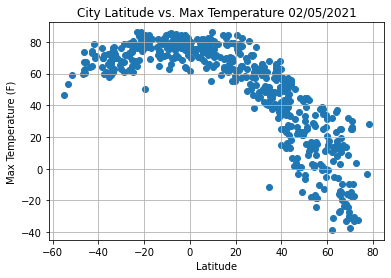

In [9]:
# Build a scatter plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Max Temp"], marker="o")

# Set other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

The City Latitude vs. Max Temperature plot shown above is analyzing data from all the cities. 
The latitude peak is at approximately close to 20 degree.After that value, it shows a possible to be a linear relationship
 with temperature 

## Latitude vs. Humidity Plot

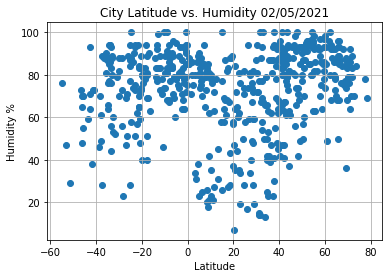

In [10]:
# Build a scatter plot 
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"], marker="o")

# Set other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

The City Latitude vs. Humidity plot shown above is analyzing data from all the cities. There does not seem to be a clear realtionship between humidity and latitude as the data points look spread out but closer to 60 degrees, there is a closer cluster of humidity.

## Latitude vs. Cloudiness Plot

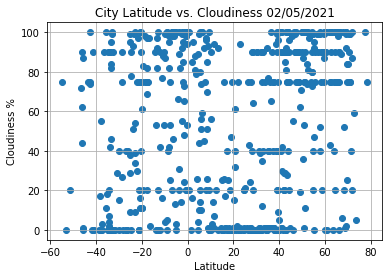

In [11]:
# Build a scatter plot 
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness"], marker="o")

# Set other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

The City Latitude vs. Cloudiness plot shown above does not seem to show a clear relationship between cloudiness and city latitude although the data points for cloudiness cluster together at 0% or 100 % for latitude degrees at 0,20,40,60 and 70. 

## Latitude vs. Wind Speed Plot

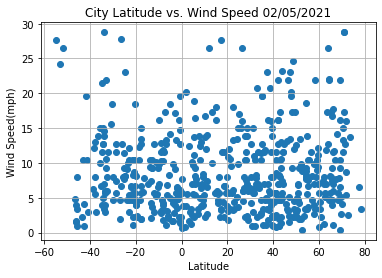

In [12]:
# Build a scatter plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed"], marker="o")

# Set other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

The City Latitude vs. Wind Speed plot shown above which is analyzing date for all cities, does not seem to show any relationship between city latitude and wind speed.The data points seems to be spread out. Most of the wind speed values are below about 20 mph, with only a few values above that wind speed limit.

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames

north_sphere = city_weather_df.loc[city_weather_df["Latitude"] >= 0]

south_sphere = city_weather_df.loc[city_weather_df["Latitude"] < 0]

south_sphere.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
1,Mataura,100,NZ,1612542578,94,-46.1927,168.8643,47.43,1.50
2,Hobart,90,AU,1612542447,83,-42.8794,147.3294,69.80,10.36
4,São José da Coroa Grande,22,BR,1612542579,63,-8.8978,-35.1478,84.83,12.88
7,Ambon City,20,ID,1612542272,78,-3.6954,128.1814,80.60,4.61
8,Morondava,100,MG,1612542272,74,-20.2833,44.2833,84.60,8.30


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
#Creating X & Y values
x_values = north_sphere["Latitude"]
y_values = north_sphere["Max Temp"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#finding regression by x values times the slope and intercept
regress_values = x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y =-1.46x + 97.28


The r squared value is: 0.7933206166682947
The r value is: -0.8906854757254632


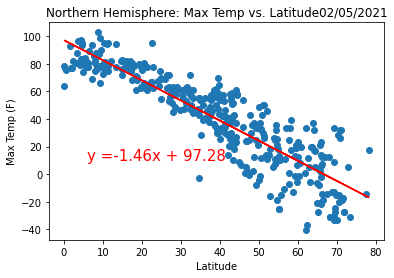

In [20]:
#PLotting the Scatter
plt.scatter(x_values,y_values)

#PLotting the line
plt.plot(x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r value
print(f"The r squared value is: {rvalue**2}")
print(f"The r value is: {rvalue}")

#Adding labels
plt.title(f'Northern Hemisphere: Max Temp vs. Latitude{time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
#plt.figure(figsize=(8,8))
plt.show()

# Save the figure

The Max Temperature vs. Latitude plot for cities in the northern hemisphere is shown above. The max temperature appears to show a strong downhill (negative) linear relationship with latitudes in the northern hemisphere, with an r-value of -0.89 for the linear regression line.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
#Creating X & Y values
s_x_values = south_sphere["Latitude"]
s_y_values = south_sphere["Max Temp"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_x_values, s_y_values)

#finding regression by x values times the slope and intercept
regress_values = s_x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y =0.39x + 84.61


The r squared value is: 0.2981965503778698
The r value is: 0.5460737591002426


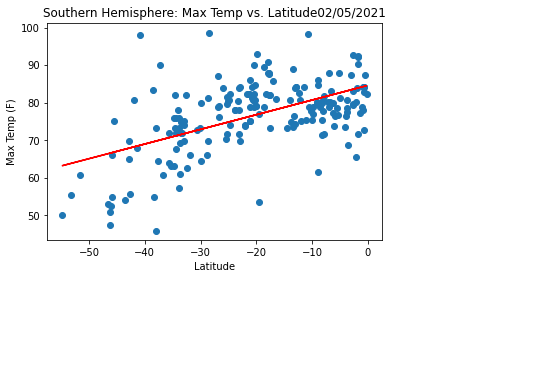

In [22]:
#PLotting the Scatter
plt.scatter(s_x_values,s_y_values)

#PLotting the line
plt.plot(s_x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r value
print(f"The r squared value is: {rvalue**2}")
print(f"The r value is: {rvalue}")

#Adding labels
plt.title(f'Southern Hemisphere: Max Temp vs. Latitude{time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
#plt.figure(figsize=(8,8))
plt.show()

The Max Temperature vs. Latitude plot for cities in the northern hemisphere is shown above. The max temperature appears to show a moderate uphill (postive) linear relationship with latitudes in the southern hemisphere, with an r-value of 0.54 for the linear regression line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
#Creating X & Y values
n_l_x_values = north_sphere["Latitude"]
n_h_y_values = north_sphere["Humidity"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_l_x_values, n_h_y_values)

#finding regression by x values times the slope and intercept
regress_values = n_l_x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y =0.52x + 50.76


The r squared value is: 0.21710746401659595
The r value is: 0.4659479198543502


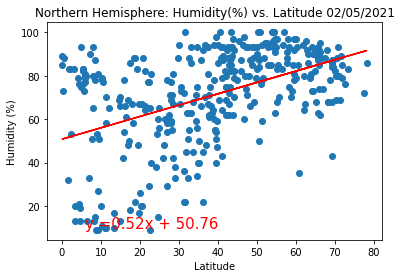

In [26]:
#PLotting the Scatter
plt.scatter(n_l_x_values,n_h_y_values)

#PLotting the line
plt.plot(n_l_x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r value
print(f"The r squared value is: {rvalue**2}")
print(f"The r value is: {rvalue}")

#Adding labels
plt.title(f'Northern Hemisphere: Humidity(%) vs. Latitude {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.figure(figsize=(8,8))
plt.show()

The Humidity (%) vs. Latitude plot for cities in the northern hemisphere is shown above. The humidity shows a weak uphill (postive) linear relationship with an r-value of 0.46 for the linear regression line.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
#Creating X & Y values
s_l_x_values = south_sphere["Latitude"]
s_h_y_values = south_sphere["Humidity"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_l_x_values, s_h_y_values)

#finding regression by x values times the slope and intercept
regress_values = s_l_x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y =0.25x + 76.38


The r squared value is: 0.032436146689881276
The r value is: 0.18010037948289082


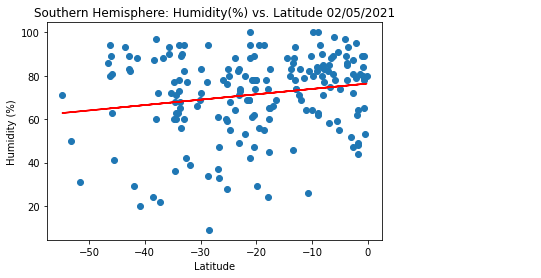

In [28]:
#PLotting the Scatter
plt.scatter(s_l_x_values,s_h_y_values)

#PLotting the line
plt.plot(s_l_x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r value
print(f"The r squared value is: {rvalue**2}")
print(f"The r value is: {rvalue}")

#Adding labels
plt.title(f'Southern Hemisphere: Humidity(%) vs. Latitude {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.figure(figsize=(8,8))
plt.show()

The Humidity (%) vs. Latitude plot for cities in the souhern hemisphere is shown above. The data does not seem to show any relationship between the humidity and latitude for the southern hemisphere as the r-value is 0.18 for the linear regression line which is nearly close to not having a linear relationship between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
#Creating X & Y values
n_l_x_values = north_sphere["Latitude"]
n_c_y_values = north_sphere["Cloudiness"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_l_x_values, n_c_y_values)

#finding regression by x values times the slope and intercept
regress_values = n_l_x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y =0.45x + 39.44


The r squared value is: 0.05457591323664696
The r value is: 0.23361488230985406


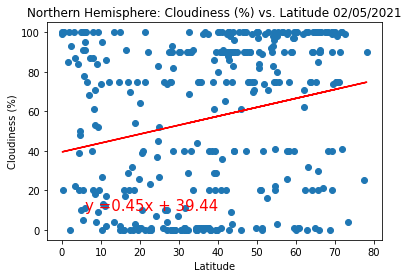

In [30]:
#PLotting the Scatter
plt.scatter(n_l_x_values,n_c_y_values)

#PLotting the line
plt.plot(n_l_x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r value
print(f"The r squared value is: {rvalue**2}")
print(f"The r value is: {rvalue}")

#Adding labels
plt.title(f'Northern Hemisphere: Cloudiness (%) vs. Latitude {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.figure(figsize=(8,8))
plt.show()

The Cloudiness (%) vs. Latitude plot for cities in the northern hemisphere is shown above. The data seems to show no relationship between cloudiness and latitude for the northern hemisphere as the r-value is 0.23 for the linear regression line which is nearly close to not having a linear relationship between the two.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [31]:
#Creating X & Y values
s_l_x_values = south_sphere["Latitude"]
s_c_y_values = south_sphere["Cloudiness"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_l_x_values, s_c_y_values)

#finding regression by x values times the slope and intercept
regress_values = s_l_x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y =0.41x + 64.83


The r squared value is: 0.023595306299147318
The r value is: 0.15360763750265582


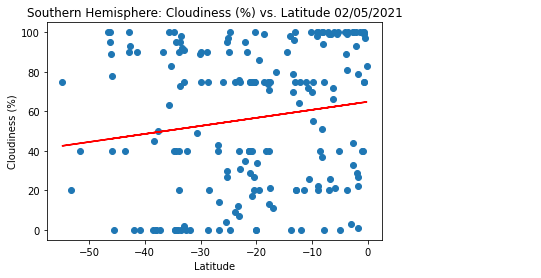

In [32]:
#PLotting the Scatter
plt.scatter(s_l_x_values,s_c_y_values)

#PLotting the line
plt.plot(s_l_x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r value
print(f"The r squared value is: {rvalue**2}")
print(f"The r value is: {rvalue}")

#Adding labels
plt.title(f'Southern Hemisphere: Cloudiness (%) vs. Latitude {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.figure(figsize=(8,8))
plt.show()

The Cloudiness (%) vs. Latitude plot for cities in the southern hemisphere is shown above. The data seems to show no relationship between cloudiness and latitude for the southern hemisphere as the r-value is 0.15 for the linear regression line which is nearly close to not having a linear relationship between the two.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
#Creating X & Y values
n_l_x_values = north_sphere["Latitude"]
n_w_y_values = north_sphere["Wind Speed"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_l_x_values, n_w_y_values)

#finding regression by x values times the slope and intercept
regress_values = n_l_x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y =0.03x + 7.48


The r squared value is: 0.007907074171291443
The r value is: 0.08892173059096097


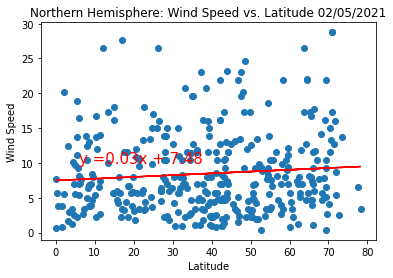

In [34]:
#PLotting the Scatter
plt.scatter(n_l_x_values,n_w_y_values)

#PLotting the line
plt.plot(n_l_x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r value
print(f"The r squared value is: {rvalue**2}")
print(f"The r value is: {rvalue}")

#Adding labels
plt.title(f'Northern Hemisphere: Wind Speed vs. Latitude {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#plt.figure(figsize=(8,8))
plt.show()

The Wind Speed vs. Latitude plot for cities in the northern hemisphere is shown above. The data seems to show no relationship between wind speed and latitude for the northern hemisphere as the r-value is 0.08 for the liner regression line. However it looks like the wind speed increases as you move away from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [35]:
#Creating X & Y values
s_l_x_values = south_sphere["Latitude"]
s_w_y_values = south_sphere["Wind Speed"]

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_l_x_values, s_w_y_values)

#finding regression by x values times the slope and intercept
regress_values = s_l_x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y =-0.08x + 6.67


The r squared value is: 0.03899329305687875
The r value is: -0.19746719488785663


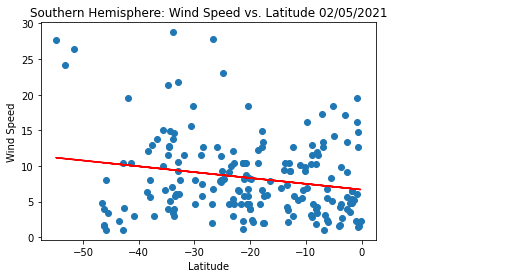

In [36]:
#PLotting the Scatter
plt.scatter(s_l_x_values,s_w_y_values)

#PLotting the line
plt.plot(s_l_x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r value
print(f"The r squared value is: {rvalue**2}")
print(f"The r value is: {rvalue}")

#Adding labels
plt.title(f'Southern Hemisphere: Wind Speed vs. Latitude {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#plt.figure(figsize=(8,8))
plt.show()

The Wind Speed vs. Latitude plot for cities in the southern hemisphere is shown above. The data seems to show no relationship between wind speed and latitude for the southern hemisphere as the r-value is -0.19 for the liner regression line. However it looks like the wind speed increases as you move away from the equator.